In [1]:
import pickle

with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/CircleSplitting_2024-05-31_13-05-59.pkl", "rb") as f:
    data_circle = pickle.load(f)
    
with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/HyperbolicSplitting_2024-05-31_12-59-56.pkl", "rb") as f:
    data_hyperbolic = pickle.load(f)
    
with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/Hyperplane_2024-05-31_13-05-43.pkl", "rb") as f:
    data_hyperplane = pickle.load(f)

with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/SingleDimensionHyperplane_2024-05-31_13-06-13.pkl", "rb") as f:
    data_single = pickle.load(f)
    
with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/EllipsoidSplitting_2024-06-04_20-51-21.pkl", "rb") as f:
    data_ellipsoid = pickle.load(f)
    
with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/ParaboloidSplitting_2024-06-04_10-42-52.pkl", "rb") as f:
    data_paraboloid = pickle.load(f)  

with open("/Users/alessio/Documents/FuBIF/results/numeric/AUCFS/ConicSplitting_2024-06-04_10-46-49.pkl", "rb") as f:
    data_conic = pickle.load(f)
    

In [2]:
#unify the dictionaries

data = {**data_circle, **data_hyperbolic, **data_hyperplane, **data_single, **data_ellipsoid, **data_paraboloid, **data_conic}

In [3]:
data.keys()

dict_keys(['CircleSplitting', 'HyperbolicSplitting', 'Hyperplane', 'SingleDimensionHyperplane', 'EllipsoidSplitting', 'ParaboloidSplitting', 'ConicSplitting'])

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

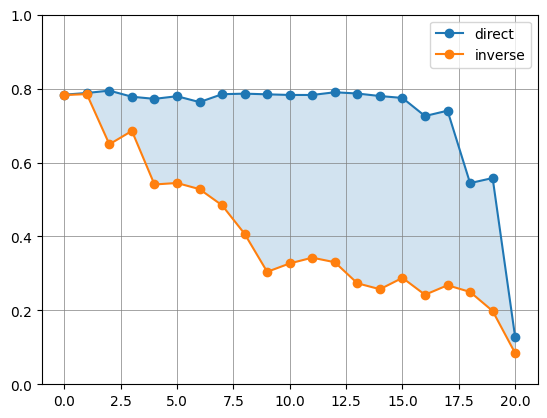

In [6]:
direct = [np.mean(x) for x in data["ParaboloidSplitting"]["cardio"]['Scenario evaluation 2']["plus True"]["Scenario2"]["plus True"]["direct"]["Avg Prec"]]
inverse = [np.mean(x) for x in data["ParaboloidSplitting"]["cardio"]['Scenario evaluation 2']["plus True"]["Scenario2"]["plus True"]["inverse"]["Avg Prec"]]

plt.plot(direct, label="direct", marker="o")
plt.plot(inverse, label="inverse", marker="o")
plt.fill_between(range(len(direct)), inverse, np.max([direct, inverse], axis=0), alpha=0.2)
plt.legend()
plt.grid(color='gray', linewidth=0.5)
plt.ylim(0, 1)
plt.show()

In [7]:
data_AUCFS = {}
for dataset in data['CircleSplitting']:
    data_AUCFS[dataset] = {}
    for algorithm in ['CircleSplitting', 'HyperbolicSplitting', 'Hyperplane', 'SingleDimensionHyperplane', 'EllipsoidSplitting', 'ParaboloidSplitting', 'ConicSplitting']:
        data_AUCFS[dataset][algorithm] = {}
        for scenario in data[algorithm][dataset]:
            for label in data[algorithm][dataset][scenario]:
                for scenario2 in data[algorithm][dataset][scenario][label]:
                    for label2 in data[algorithm][dataset][scenario][label][scenario2]: 
                        label_id = eval(label.replace("plus ",""))
                        label2_id = eval(label2.replace("plus ",""))
                        string_identifier = f"{scenario[-1]}_{label_id}_{scenario2[-1]}_{label2_id}"
                        method = 'Avg Prec'
                        direct = [np.mean(x) for x in data[algorithm][dataset][scenario][label][scenario2][label2]["direct"][method]]
                        inverse = [np.mean(x) for x in data[algorithm][dataset][scenario][label][scenario2][label2]["inverse"][method]]
                        aucfs = np.mean([x-y for x, y in zip(direct, inverse)])
                        data_AUCFS[dataset][algorithm][string_identifier] = aucfs


In [8]:
import seaborn as sns

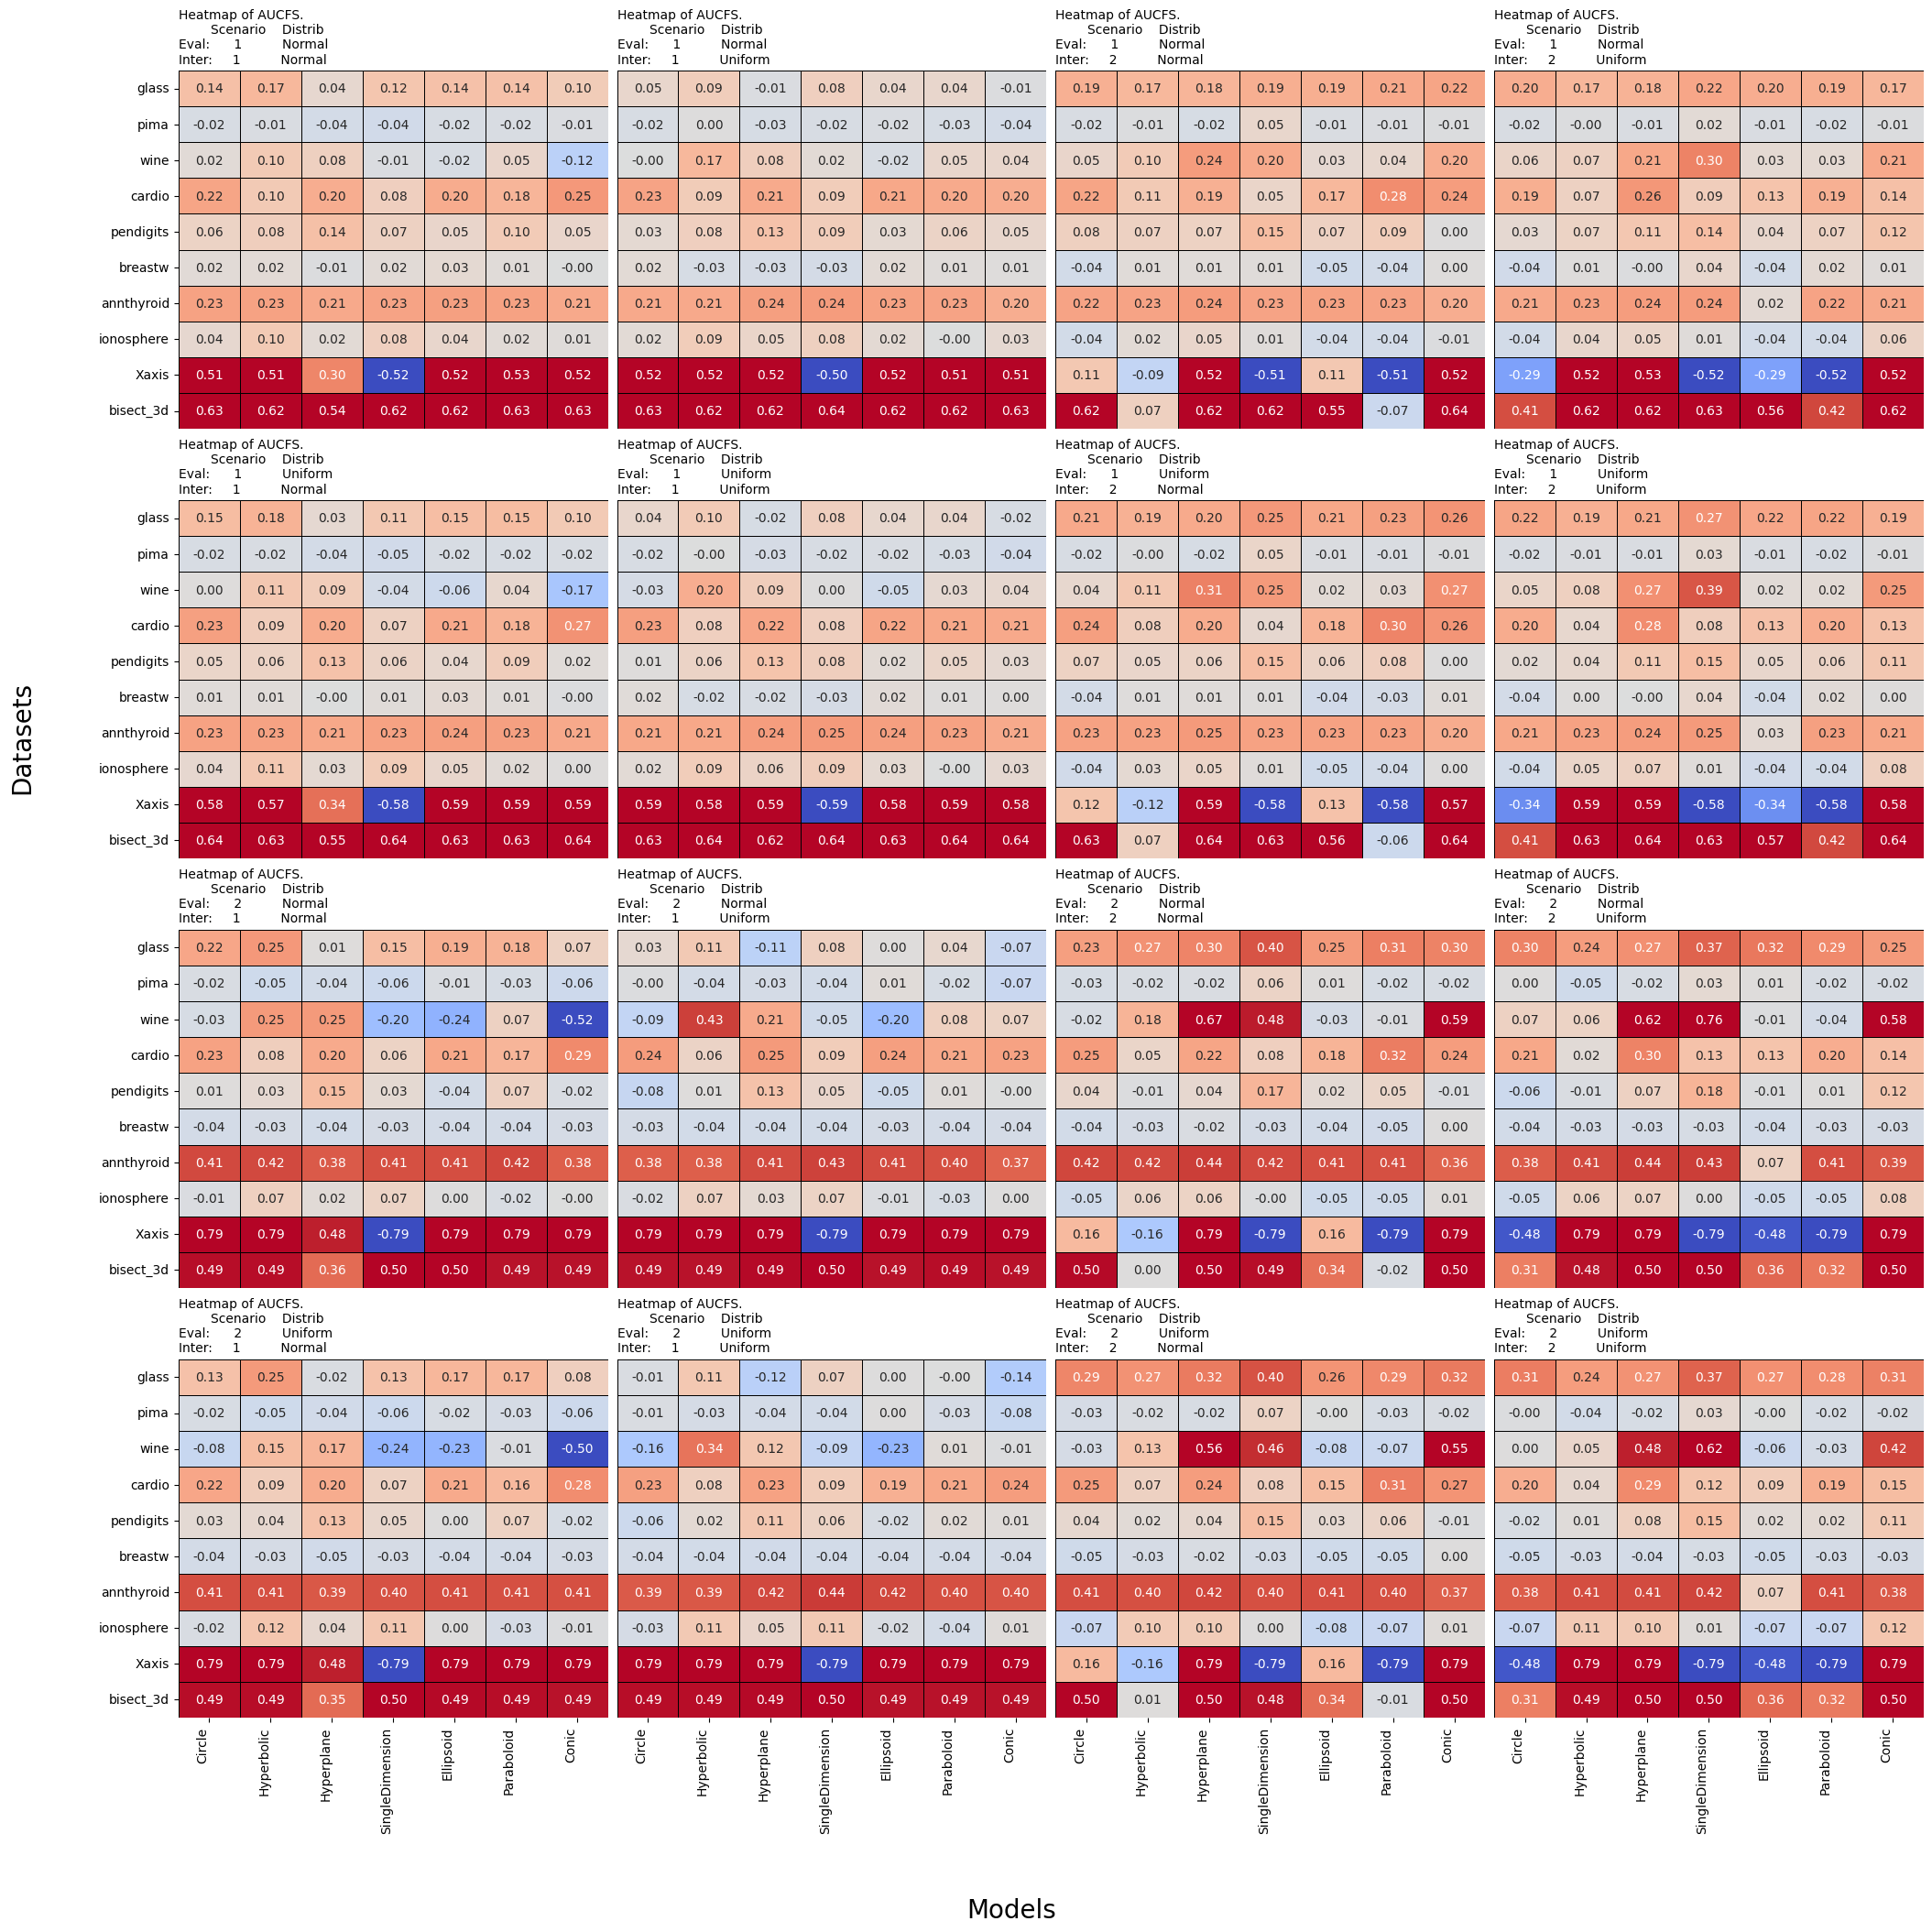

In [17]:
datasets = list(data_AUCFS.keys())
models = list(data_AUCFS["glass"].keys())
identifiers = list(data_AUCFS["glass"]["CircleSplitting"].keys())

model_names = ['Circle', 'Hyperbolic', 'Hyperplane', 'SingleDimension', 'Ellipsoid', 'Paraboloid', 'Conic']

# Prepare data for heatmap
heatmap_data = {identifier: np.array([[data_AUCFS[dataset][model][identifier] for model in models] for dataset in datasets]) for identifier in identifiers}

# Plotting
fig, axs = plt.subplots(4, 4, figsize=(20, 20), constrained_layout=True)

for  i, (identifier, values) in enumerate(heatmap_data.items()):
    k,j = np.divmod(i,4)
    if j ==0 and k ==3:
        sns.heatmap(values, annot=True, xticklabels=model_names, yticklabels=datasets, cmap='coolwarm', fmt=".2f", ax=axs[k,j],linecolor='black', linewidths = 0.5, cbar=False, vmin=-0.5, vmax=0.5)
        axs[k,j].set_yticklabels(axs[k,j].get_yticklabels(),rotation=0)
        axs[k,j].set_xticklabels(axs[k,j].get_xticklabels(),  ha='right')
    elif j==0:
        sns.heatmap(values, annot=True, xticklabels=False, yticklabels=datasets, cmap='coolwarm', fmt=".2f", ax=axs[k,j],linecolor='black', linewidths = 0.5, cbar=False, vmin=-0.5, vmax=0.5)
        axs[k,j].set_yticklabels(axs[k,j].get_yticklabels(),rotation=0)
    elif k < 3 and j !=0:
        sns.heatmap(values, annot=True, xticklabels=False, yticklabels=False, cmap='coolwarm', fmt=".2f", ax=axs[k,j],linecolor='black', linewidths = 0.5, cbar=False, vmin=-0.5, vmax=0.5)
    else:
        sns.heatmap(values, annot=True, xticklabels=model_names, yticklabels=False, cmap='coolwarm', fmt=".2f", ax=axs[k,j],linecolor='black', linewidths = 0.5, cbar=False, vmin=-0.5, vmax=0.5)
        axs[k,j].set_xticklabels(axs[k,j].get_xticklabels(), ha='right')
        
    ids = identifier.split("_")
    split_dist = (1-eval(ids[1]))*"Uniform"+eval(ids[1])*"Normal"
    split_dist_2 = (1-eval(ids[3]))*"Uniform"+eval(ids[3])*"Normal"
    axs[k,j].set_title(f'Heatmap of AUCFS.\n        Scenario    Distrib\nEval:      {ids[0]}          {split_dist}\nInter:     {ids[2]}          {split_dist_2}', fontsize = 10,loc="left")
    axs[k,j].set_ylabel('')
    
fig.text(-0.04, 0.6, 'Datasets', ha='center', va='center', fontsize = 20,rotation = 90)
fig.text(0.5, -0.04, 'Models', ha='center', va='center', fontsize = 20)
plt.savefig("/Users/alessio/Documents/FuBIF/results/plots/interpretation_results_V2.png", dpi=300)
plt.show()